In [754]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv('../data/hr_dataset_silver.csv') #type: ignore
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(suppress=True)

In [755]:
# categorical_int = [
#     'attrition',  # target
#     'education',
#     'environment_satisfaction',
#     'job_involvement',
#     'job_level',
#     'job_satisfaction',
#     'gender',
#     'over_time',
#     'performance_rating',
#     'relationship_satisfaction',
#     'stock_option_level',
#     'work_life_balance'
# ]
# categorical_obj = [
#     'business_travel',
#     'department',
#     'education_field',
#     'job_role',
#     'marital_status'
# ]

# numeric_features = [
#     'age',
#     'daily_rate',
#     'distance_from_home',
#     'hourly_rate',
#     'monthly_income',
#     'monthly_rate',
#     'num_companies_worked',
#     'total_working_years',
#     'training_times_last_year',
#     'years_at_company',
#     'years_in_current_role',
#     'years_since_last_promotion',
#     'years_with_curr_manager'
# ]

# for col in categorical_int + categorical_obj:
#     df[col] = df[col].astype('category')

# for col in numeric_features:
#     df[col] = pd.to_numeric(df[col], errors='coerce')



In [756]:
def cast_columns(df: pd.DataFrame):
    ordinal_cols = [
        "education",
        "environment_satisfaction",
        "job_involvement",
        "job_level",
        "job_satisfaction",
        "performance_rating",
        "relationship_satisfaction",
        "stock_option_level",
        "work_life_balance"
    ]
    
    for col in ordinal_cols:
        df[col] = df[col].astype(int)
    if df["over_time"].dtype.name == "category":
        df["over_time"] = df["over_time"].map({"Yes": 1, "No": 0})

    return df
def feature_engineering(df:pd.DataFrame):
    df["low_job_satisfaction"] = (df["job_satisfaction"] <= 2).astype(int)
    df["low_env_satisfaction"] = (df["environment_satisfaction"] <= 2).astype(int)
    df["low_work_life_balance"] = (df["work_life_balance"] <= 2).astype(int)
    df["stuck_in_role"] = (df["years_since_last_promotion"] == 0).astype(int)
    df["promotion_ratio"] = df["years_since_last_promotion"] / (df["years_at_company"] + 1)
    df["early_start_ratio"] = df["total_working_years"] / (df["age"] + 1)
    df["income_per_level"] = df["monthly_income"] / (df["job_level"] + 1)
    df["overtime_low_balance"] = ((df["over_time"] == 1) & (df["work_life_balance"] <= 2)).astype(int)
    df["job_hopping_ratio"] = df["num_companies_worked"] / (df["total_working_years"] + 1)
    df["distance_bin"] = pd.cut(
        df["distance_from_home"], 
        bins=[-1, 5, 15, 100], 
        labels=["near", "medium", "far"]
    )
    df["low_sat_low_involvement"] = (
        (df["job_satisfaction"] <= 2) & (df["job_involvement"] <= 2)
    ).astype(int)

    return df

In [757]:
df_features = feature_engineering(cast_columns(df))

df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.000000,36.000000,43.000000,60.000000
attrition,1470.0,0.161224,0.367863,0.0,0.000000,0.000000,0.000000,1.000000
daily_rate,1470.0,802.485714,403.509100,102.0,465.000000,802.000000,1157.000000,1499.000000
distance_from_home,1470.0,9.192517,8.106864,1.0,2.000000,7.000000,14.000000,29.000000
education,1470.0,2.912925,1.024165,1.0,2.000000,3.000000,4.000000,5.000000
employee_number,1470.0,1024.865306,602.024335,1.0,491.250000,1020.500000,1555.750000,2068.000000
environment_satisfaction,1470.0,2.721769,1.093082,1.0,2.000000,3.000000,4.000000,4.000000
gender,1470.0,0.600000,0.490065,0.0,0.000000,1.000000,1.000000,1.000000
hourly_rate,1470.0,65.891156,20.329428,30.0,48.000000,66.000000,83.750000,100.000000
job_involvement,1470.0,2.729932,0.711561,1.0,2.000000,3.000000,3.000000,4.000000


In [758]:
def rename_columns(df: pd.DataFrame):
   return df.rename(columns={cols: re.sub(r'(?<!^)(?=[A-Z])|(?<=[a-zA-Z])(?=\d)', '_', cols).lower() for cols in df.columns})

## Prevendo a possibilidade de desligamento

In [759]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import NearMiss

class Models(KNeighborsClassifier, RandomForestClassifier,XGBClassifier): # Criei esta classe apenas para tipar o parametro Model
     ...
standardization = StandardScaler()
RANDOM_STATE = 42
TEST_SIZE = 0.2
SEED = 100

class ModelTrainer: #Classe para armazenar os modelos testados
    def __init__(self, random_state: int = RANDOM_STATE):
        self.random_state = random_state
        self.models_scores = {}


    def get_better_params(self, x_train, y_train):
        best_params = {}
        best_scores = {}
        models = self.define_models()
        param_grids = {
        "KNeighborsClassifier": {"n_neighbors": [3,5,7], "weights": ["uniform","distance"], "metric": ["euclidean","manhattan"]},
        "RandomForestClassifier": {"n_estimators":[50,100], "criterion":["gini","entropy"], "max_depth":[None,5,10]},
         "XGBClassifier": {
            "max_depth": [3, 4, 5, 6],
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [50, 100, 150],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "min_child_weight": [1, 3, 5],
            "scale_pos_weight": [1, 2, 3, 5],
        },
        "LogisticRegression": {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver': ['liblinear', 'saga'],'penalty': ['l1', 'l2']},
        
        }

        for model in models:
          grid_search = GridSearchCV(models[model], param_grid=param_grids[model], n_jobs=-3,cv=5)
          grid_search.fit(x_train, y_train)
          best_scores[model] = grid_search.best_score_
          best_params[model] = grid_search.best_params_

        return best_scores, best_params
    
    def define_models(self):
        return {
            "KNeighborsClassifier": KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
            "RandomForestClassifier": RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=100),
            "XGBClassifier": XGBClassifier(
                                colsample_bytree=1.0,
                                learning_rate=0.05,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100,
                                subsample=0.6,
                            
                            ),
            "LogisticRegression": LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
        }
    
    def prepare_data(self, df: pd.DataFrame):
        text_columns = ['attrition','employee_number']
        x = df.drop(text_columns , axis=1, errors='ignore')
        y = df['attrition'] 
        return x, y
    
    def apply_one_hot_encoder(self, df: pd.DataFrame):
         x,y = self.prepare_data(df)

         categorical_cols = x.select_dtypes(include=['category']).columns.to_list()
         numeric_cols = x.select_dtypes(include=['int64','float64']).columns.to_list()

         transform = ColumnTransformer(
          transformers=[
            ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
            ('scaler', StandardScaler(), numeric_cols)
          ]
         )
         x_transformed = transform.fit_transform(x)

         ohe_change_names = transform.named_transformers_['onehot'].get_feature_names_out(categorical_cols)

         final_names = list(ohe_change_names) + numeric_cols

         x_final = pd.DataFrame(x_transformed, columns=final_names, index=x.index) #type: ignore

         return rename_columns(x_final), y
    
    def fit_and_score(self, models:dict[str,Models], x_train, x_test,y_train,y_test): 
         models_scores = {} # dicionário que armazena o score
         for name, model in models.items(): # cria o dicionário dinamocamente
                model.fit(x_train,y_train)
                models_scores[name] = model.score(x_test, y_test)
         return models_scores
    

    def get_predictions(self,models:dict[str,Models], x_test):
         
        predict_df = pd.DataFrame([])
        for name, model in models.items():
             predict_df[name] = model.predict(x_test)
        return predict_df
    
    def confusion_matrix_evaluation(self, models,y_test,y_pred):
        evaluation_models = {}
        for name, _ in models.items():
             cn = confusion_matrix(y_test, y_pred[name])
             true_negative,false_positive , false_negative, true_positive  = cn.ravel()
             evaluation_models[name] = pd.DataFrame([[true_negative, false_positive],
                                                    [false_negative, true_positive]],
                                                     index=["Real Negativo", "Real Positivo"],
                                                     columns=["Previsto Negativo", "Previsto Positivo"]
                                                    )
        return evaluation_models
    def data_balance(self, x, y, method='smote'):
        if method == 'under': 
            nm = NearMiss()
            result_x, result_y = nm.fit_resample(x, y) # type: ignore
            return result_x, result_y   # agora consistente
        
        smote_balance = SMOTE(random_state=SEED)
        result_x, result_y = smote_balance.fit_resample(x, y) #type: ignore
        return result_x, result_y

In [760]:
trainer = ModelTrainer()

models = trainer.define_models()

x, y =trainer.apply_one_hot_encoder(df_features)

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)


x_trainb, y_trainb = trainer.data_balance(x_train, y_train)


models_score = trainer.fit_and_score(
    models=models,
    x_train=x_trainb,
    x_test=x_test,
    y_train=y_trainb,
    y_test=y_test
)


In [761]:
best_scores, best_params = trainer.get_better_params(x_train=x_trainb, y_train=y_trainb)
for model_name, params in best_params.items():
    print(f"# Melhores parâmetros para {model_name}")
    print(f"{model_name} = {model_name}(**{params})\n")

KeyboardInterrupt: 

In [ ]:
y_pred = trainer.get_predictions(models, x_test)

### Avaliando nossos modelos

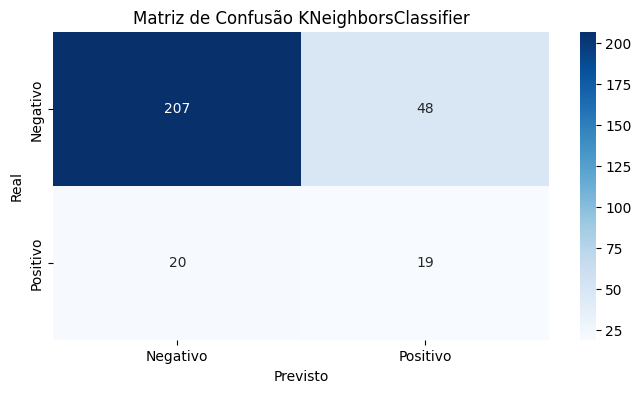

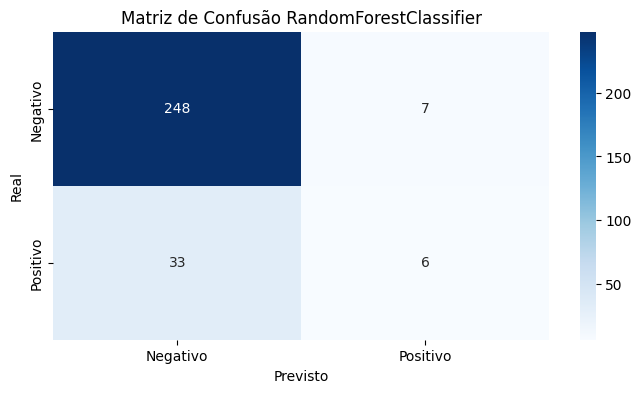

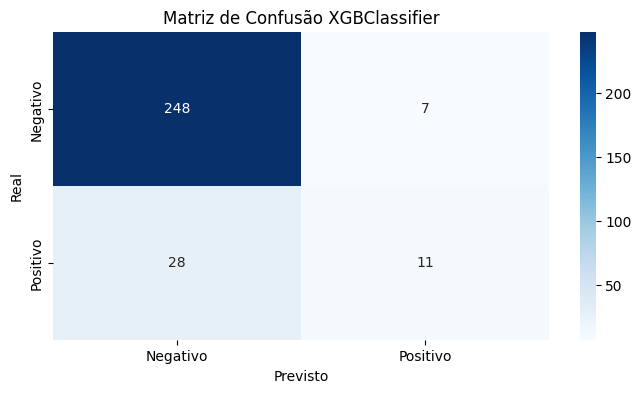

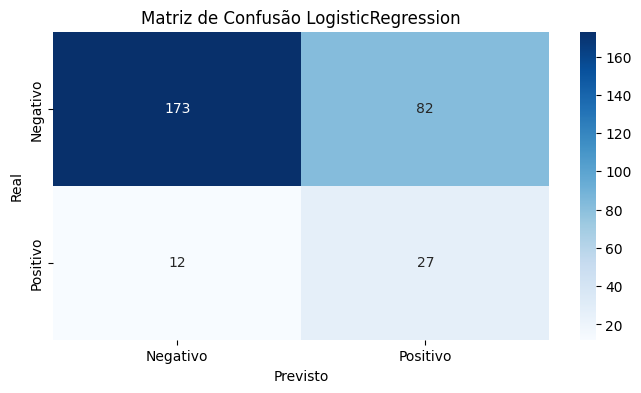

In [ ]:
matrix_models = trainer.confusion_matrix_evaluation(models, y_test, y_pred)

for model in matrix_models:
    labels = ['Negativo', 'Positivo']
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix_models[model], annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.title('Matriz de Confusão ' + model)
    plt.show()


In [ ]:
for model in models:
    print(model + '_'* 100)
    print(classification_report(y_test, y_pred[model], target_names=['Negativo', 'Positivo']))


KNeighborsClassifier____________________________________________________________________________________________________
              precision    recall  f1-score   support

    Negativo       0.91      0.81      0.86       255
    Positivo       0.28      0.49      0.36        39

    accuracy                           0.77       294
   macro avg       0.60      0.65      0.61       294
weighted avg       0.83      0.77      0.79       294

RandomForestClassifier____________________________________________________________________________________________________
              precision    recall  f1-score   support

    Negativo       0.88      0.97      0.93       255
    Positivo       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294

XGBClassifier_________________________________________________________________________________________

KNeighborsClassifier____________________________________________________________________________________________________


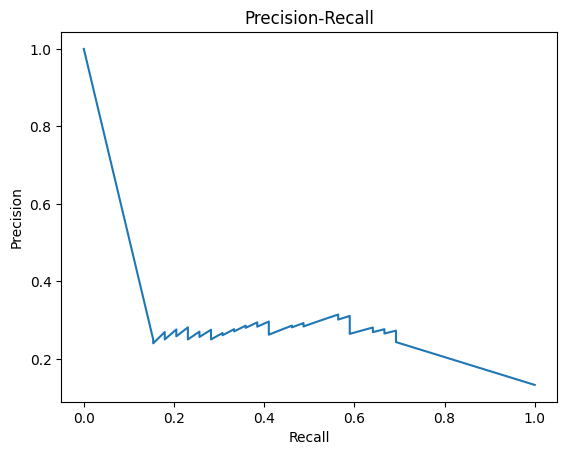

RandomForestClassifier____________________________________________________________________________________________________


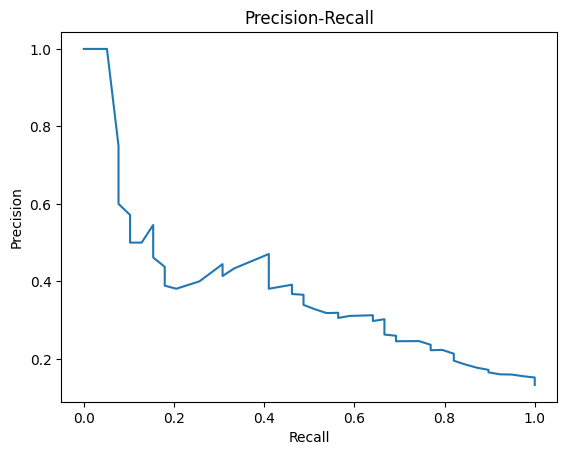

XGBClassifier____________________________________________________________________________________________________


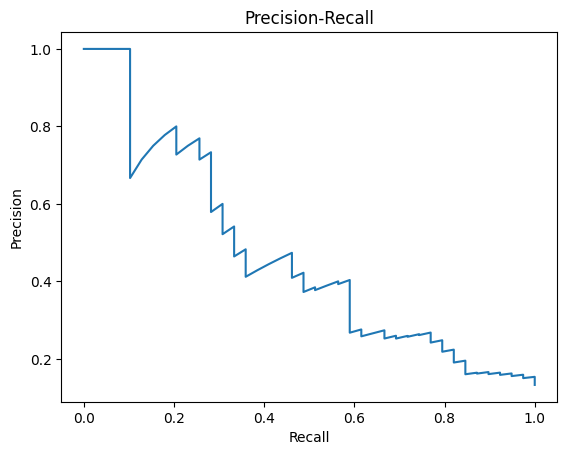

LogisticRegression____________________________________________________________________________________________________


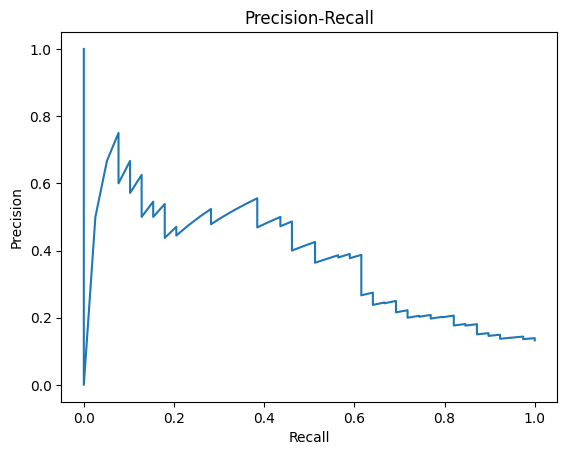

In [ ]:
for model in models:
    print(model + '_'* 100)
    probs = models[model].predict_proba(x_test)[:,1]
    prec, rec, thr = precision_recall_curve(y_test, probs)

    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall")
    plt.show()